## **Proyecto 2 - Productos bancarios**
**Analítica Computacional para la toma de Decisiones**

Grupo: 
1.	Nicolay Esteban Barrera Bayona – 201731399
2.	Daniel Sebastian Caro Ochoa – 202117080


**Roles**
- Nicolay Barrera: Ciencia de datos, Tablero de datos y Despliegue 
- Daniel Caro: Ingeniería de datos, Análisis de datos y Análisis de negocio 

### **1. Definición de Enfoque**


***


In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Cargar el archivo CSV
data = pd.read_csv('bank-full.csv', sep=';')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Información general sobre el dataset (tipos de datos y valores nulos)
print("\nInformación general del dataset:")
data.info()

# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(data.describe())

# Verificar valores nulos en cada columna
print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())

# Identificar columnas numéricas y de texto
caracteristicas_numericas = data.select_dtypes(include=[np.number]).columns.to_list()
caracteristicas_texto = data.select_dtypes(include=[object]).columns.to_list()

print("\nCaracterísticas numéricas:\n", caracteristicas_numericas)
print("\nCaracterísticas de texto:\n", caracteristicas_texto)

# Mostrar un análisis de los valores únicos en las columnas de texto
print("\nValores únicos en columnas de texto:")
for col in caracteristicas_texto:
    print(f"{col}: {data[col].nunique()} valores únicos")

# Mostrar los datos faltantes en porcentajes
print("\nPorcentaje de datos faltantes por columna:")
print((data.isnull().sum() / len(data)) * 100)


Primeras filas del dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

### **2. Descripción y Limpieza de Datos**

#### **2.1 Descripción General**
- Cantidad de Registros: El dataset contiene 1197 registros.

- Columnas Numéricas: Las principales columnas numéricas son smv, wip, over_time, incentive, idle_time, no_of_workers, y actual_productivity. Estas representan valores como el tiempo estándar de trabajo, trabajo en progreso, tiempo extra, incentivos financieros, y productividad real de los equipos.
- Columnas de Texto: Las columnas de texto incluyen date, quarter, department, y day, lo cual proporciona información categórica sobre las fechas, departamentos y turnos.
- Valores Nulos: La columna wip (trabajo en progreso) presenta algunos valores nulos, lo que indica que no siempre se registró esta métrica para ciertos días o equipos.
- Valores Atípicos: Se observaron grandes diferencias entre las columnas numéricas, como el over_time, que varía desde 0 hasta miles de minutos.
- Duplicados: No se detectaron datos duplicados hasta ahora.


In [130]:
# Verificar duplicados
duplicados = datos_eps.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")

# Mostrar valores únicos en la columna 'no_of_style_change'
print("\nValores únicos en 'no_of_style_change':")
print(datos_eps['no_of_style_change'].unique())

# Identificar valores atípicos usando IQR (Interquartile Range) para las columnas numéricas
Q1 = datos_eps[caracteristicas_numericas].quantile(0.25)
Q3 = datos_eps[caracteristicas_numericas].quantile(0.75)
IQR = Q3 - Q1
valores_atipicos = ((datos_eps[caracteristicas_numericas] < (Q1 - 1.5 * IQR)) | (datos_eps[caracteristicas_numericas] > (Q3 + 1.5 * IQR))).sum()

print("\nValores atípicos por columna:")
print(valores_atipicos)

# Verificar tipos de datos
print("\nTipos de datos incorrectos:")
for columna in datos_eps.columns:
    if datos_eps[columna].dtype == 'object':
        try:
            datos_eps[columna].astype(float)
        except:
            print(f"La columna '{columna}' tiene valores no numéricos.")

profile = ProfileReport(datos_eps, title = "Reporte de Datos")
profile.to_notebook_iframe()

Duplicados encontrados: 0

Valores únicos en 'no_of_style_change':
[0 1 2]

Valores atípicos por columna:
team                       0
targeted_productivity     79
smv                        0
wip                       22
over_time                  1
incentive                 11
idle_time                 18
idle_men                  18
no_of_style_change       147
no_of_workers              0
dtype: int64

Tipos de datos incorrectos:
La columna 'date' tiene valores no numéricos.
La columna 'quarter' tiene valores no numéricos.
La columna 'department' tiene valores no numéricos.
La columna 'day' tiene valores no numéricos.
La columna 'actual_productivity' tiene valores no numéricos.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### **2.2 Calidad de los Datos**

Valores Faltantes:
- wip: La variable wip presenta una gran cantidad de valores faltantes, específicamente 506 celdas vacías, lo que corresponde al 42.3% de los datos. Esto es un porcentaje elevado y requiere una estrategia adecuada para manejar estos valores, ya sea imputación o eliminación de registros.
- Otras variables, como over_time, incentive, y idle_time, presentan algunos valores faltantes, pero estos representan porcentajes menores al 3% del total, lo que es manejable.

Desbalance y Comportamientos Constantes:
- idle_time e idle_men: Ambas variables tienen un comportamiento bastante constante, con más del 98% de sus registros con valor 0, lo que indica que la producción no estuvo inactiva la mayor parte del tiempo. Este tipo de comportamiento sesgado puede ser problemático, ya que no aporta mucha variabilidad al modelo.
- incentive: Un 50.5% de los registros tienen un valor de incentivo igual a 0, lo cual refleja que en muchas ocasiones no se ofrecieron incentivos financieros. Esto podría estar relacionado con la productividad y sería relevante analizar cómo afecta este comportamiento en el análisis.

Valores Inconsistentes:
- No se han identificado valores numéricos inconsistentes. Todas las variables numéricas tienen rangos de valores que parecen lógicos dentro del contexto de productividad en manufactura. Sin embargo, el hecho de que ciertas variables tengan valores constantes o nulos puede reducir su relevancia.

Correlación entre Variables:
- Existe una alta correlación entre varias variables:
  - wip y team tienen una correlación positiva significativa.
  - smv muestra una correlación alta con targeted_productivity, lo que es lógico ya que los minutos estándar asignados impactan en la productividad objetivo.
  - idle_men e idle_time presentan una correlación muy alta, lo que sugiere que ambas variables capturan una dinámica muy similar. Esto puede llevar a redundancia, por lo que podríamos considerar eliminar una de estas variables.

Tipos de Dato Incorrectos:
- Varias columnas categóricas, como date, quarter, department y day, no se manejan con el tipo de dato correcto en el análisis inicial. Es recomendable convertir date a un formato de fecha y quarter, department, y day a categorías o variables indicadoras (dummy variables) para facilitar su análisis y modelado.
- No se identificaron problemas significativos con el tipo de dato de las variables numéricas.

Duplicados:
- No se identificaron filas duplicadas, por lo que no se requiere una acción específica para limpiar datos duplicados.

Valores Atípicos:
- Se identificaron algunos valores atípicos, especialmente en variables como:
  - targeted_productivity y wip, que tienen rangos amplios y podrían incluir valores atípicos. Estos valores extremos podrían requerir un tratamiento específico si afectan el análisis.
  - over_time presenta algunos valores extremadamente altos, lo que podría estar relacionado con equipos que trabajaron mucho tiempo extra en días específicos.
  - no_of_style_change presenta una gran concentración de registros con valor 0, lo cual puede ser relevante dependiendo del análisis a realizar, pero también indica un posible sesgo hacia la falta de cambios de estilo.


#### **2.3 Transformación sobre los datos**

Luego de llevar a cabo un análisis y entendimiento profundo de los datos, se llego a la siguiente conclusión respecto a cada características.

	

	

actual_productivity	Mantener como variable objetivo	Esta es la variable dependiente principal que queremos analizar y predecir.



| Característica   | Desición   | Justificación   |
|----------------|----------------|----------------|
|idle_time| Eliminar |  Más del 98% de los registros tienen un valor de 0, lo que indica que esta variable no aporta variabilidad al modelo y puede ser eliminada.|
|idle_men | Eliminar | Al igual que idle_time, el 98.5% de los datos son ceros. No aporta suficiente información útil para predecir la productividad. |
|over_time | Imputar valores faltantes con la media | Los valores faltantes son menores al 3%, lo cual es manejable. Además, esta variable puede estar correlacionada con la productividad y es relevante analizarla. |
|incentive  | Imputar valores faltantes con la media | Aunque el 50.5% de los datos son ceros, esta variable es importante para medir el impacto de los incentivos en la productividad. Se imputan los valores faltantes. |
|wip | Mantener | Esta variable solo toma valor en el departamento de costura, por lo que resulta conveniente solo tenerla en cuenta cuando se analice el departamento d |
|no_of_style_change | Mantener  | Aunque tiene pocos valores diferentes de 0, los cambios de estilo pueden tener un impacto significativo en la productividad.  |
|no_of_workers | Mantener | Esta variable tiene una alta correlación con la productividad, ya que el número de trabajadores influye en el rendimiento de cada equipo. |
|smv | Mantener| smv está correlacionada con targeted_productivity y representa el tiempo estándar de trabajo asignado, lo que es crucial para analizar la eficiencia. |
|targeted_productivity | Mantener  | Esta es la productividad objetivo, por lo que es esencial mantenerla para el análisis y comparación con la productividad real.|
|team | Mantener | La variable de equipo (team) es útil para entender si hay diferencias significativas en la productividad de distintos equipos. |
|quarter, department, day | Codificar como variables categóricas | Estas variables representan información temporal y organizativa importante. Se deben codificar usando técnicas como One-Hot Encoding para incluirlas en el modelo. |
|actual_productivity | Mantener | Esta es la variable dependiente principal que queremos analizar y predecir. |


Posterior a este análisis se procede a imputar la presencia de valores nulos en todas las variables que después de la limpieza tuvieran dichos valores, lo anterior debido a que estos valores nulos, auqnue no parecen ser ignificativos en comparación con la muestra no permiten un adecuada ejecución del modelo. 


In [131]:
# Eliminar las columnas idle_time e idle_men
datos_eps.drop(['idle_time', 'idle_men'], axis=1, inplace=True)

# Imputar valores faltantes de over_time e incentive con la media
datos_eps['over_time'] = datos_eps['over_time'].fillna(datos_eps['over_time'].mean())
datos_eps['incentive'] = datos_eps['incentive'].fillna(datos_eps['incentive'].mean())

# Imputar wip por la media 
datos_eps['wip'] = datos_eps['wip'].fillna(0)

# Imputar valores faltantes de 'no_of_style_change'
if datos_eps['no_of_style_change'].isnull().sum() > 0:
    datos_eps['no_of_style_change'].fillna(datos_eps['no_of_style_change'].mode()[0], inplace=True)

# Convertir las fechas a formato de fecha
if 'date' in datos_eps.columns:
    datos_eps['date'] = pd.to_datetime(datos_eps['date'], dayfirst=False, errors='coerce')

# Comprobar y codificar team si es necesario
if datos_eps['team'].dtype != np.number:
    datos_eps['team'] = datos_eps['team'].astype(int)

# Convertir la columna "actual_productivity" a float
datos_eps['actual_productivity'] = pd.to_numeric(datos_eps['actual_productivity'], errors='coerce')

# Eliminar las filas donde 'actual_productivity' tiene valores nulos
datos_eps = datos_eps.dropna(subset=['actual_productivity'])

# Limpiar espacios en blanco en la columna 'department'
datos_eps['department'] = datos_eps['department'].str.strip()

#Crear una copia anter de codificar variables categóricas para realizar análisis descriptivo
datos_eps_2 = datos_eps

# Codificar las variables categóricas (quarter, department, day) con One-Hot Encoding
datos_eps = pd.get_dummies(datos_eps, columns=['quarter', 'department', 'day'], drop_first=True)

# Verificar los resultados finales
print("Transformaciones completadas. Vista previa del dataset:")
print(datos_eps.head())

Transformaciones completadas. Vista previa del dataset:
        date  team  targeted_productivity    smv     wip  over_time  \
0 2015-01-01     8                   0.80  26.16  1108.0       7080   
1 2015-01-01     1                   0.75   3.94     0.0        960   
2 2015-01-01    11                   0.80  11.41   968.0       3660   
3 2015-01-01    12                   0.80  11.41   968.0       3660   
4 2015-01-01     6                   0.80  25.90  1170.0       1920   

   incentive  no_of_style_change  no_of_workers  actual_productivity  \
0         98                   0           59.0             0.940725   
1          0                   0            8.0             0.886500   
2         50                   0           30.5             0.800570   
3         50                   0           30.5             0.800570   
4         50                   0           56.0             0.800382   

   quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  \
0      

C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2100604704.py:20: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if datos_eps['team'].dtype != np.number:
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2100604704.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_eps['department'] = datos_eps['department'].str.strip()


### **3. Exploración de datos**

#### **Histograma: Distribución actual de la productividad**

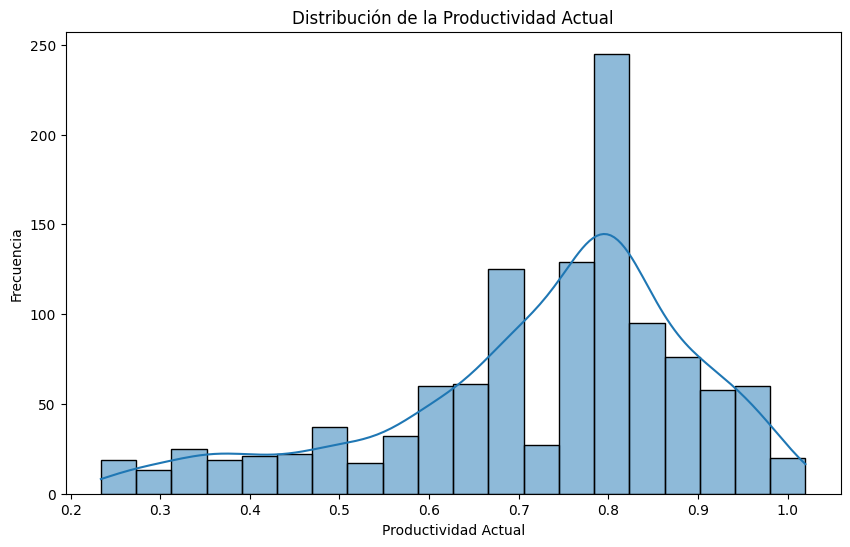

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10, 6))
sns.histplot(datos_eps_2['actual_productivity'], bins=20, kde=True)
plt.title('Distribución de la Productividad Actual')
plt.xlabel('Productividad Actual')
plt.ylabel('Frecuencia')
plt.show()

La gráfica de distribución de la productividad actual muestra un notable pico en valores cercanos a 0.8, indicando que la mayoría de los equipos presentan una productividad relativamente alta. La curva de densidad sugiere una distribución que se asemeja a una distribución normal, con una menor frecuencia en los extremos de la escala de productividad. Esto implica que, aunque la mayoría de los equipos funcionan bien, existe una variabilidad en el rendimiento que podría ser útil investigar para identificar los factores que contribuyen a estos resultados.

#### **Boxplot: Productividad según el día de la semana**

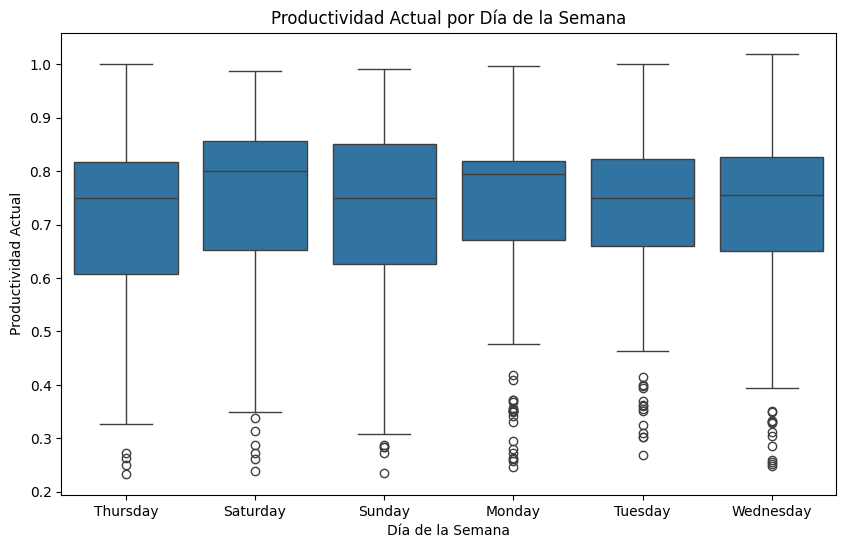

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='actual_productivity', data=datos_eps_2)
plt.title('Productividad Actual por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Productividad Actual')
plt.show()

La gráfica de caja de productividad actual por día de la semana revela diferencias significativas en el rendimiento a lo largo de la semana. Los días jueves y sábado muestran una productividad media más alta, mientras que el domingo presenta una disminución notable en la productividad, con un rango intercuartílico más estrecho y una mayor cantidad de valores atípicos. Esto sugiere que, a pesar de tener un buen rendimiento general, hay una variabilidad considerable y una caída de productividad en ciertos días, lo que podría indicar la necesidad de analizar más a fondo las condiciones laborales y factores asociados a cada día de la semana para mejorar el rendimiento.

#### **Diagrama de Dispersión: Relacion entre la productividad objetivo y productividad real**

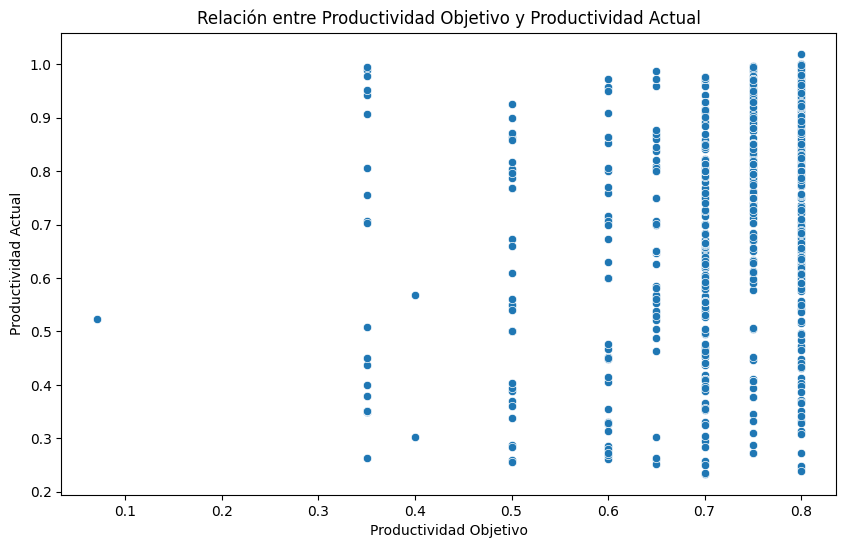

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='targeted_productivity', y='actual_productivity', data=datos_eps_2)
plt.title('Relación entre Productividad Objetivo y Productividad Actual')
plt.xlabel('Productividad Objetivo')
plt.ylabel('Productividad Actual')
plt.show()

La gráfica que muestra la relación entre la productividad objetivo y la productividad actual revela una correlación débil entre ambas variables. Se observa que, aunque hay un rango de productividades objetivas, la mayoría de los puntos se agrupan en torno a ciertos niveles de productividad actual, indicando que muchos equipos alcanzan niveles similares de productividad a pesar de diferentes objetivos. Esta distribución sugiere que establecer metas de productividad más ambiciosas no siempre se traduce en un aumento proporcional en la productividad real, lo que podría ser indicativo de limitaciones en el desempeño o factores externos que afectan el rendimiento. Para optimizar la productividad, sería útil investigar más a fondo los obstáculos que impiden que los equipos alcancen sus objetivos establecidos.

#### **Diagrama de Violín: Distribución de la productividad por departamento**

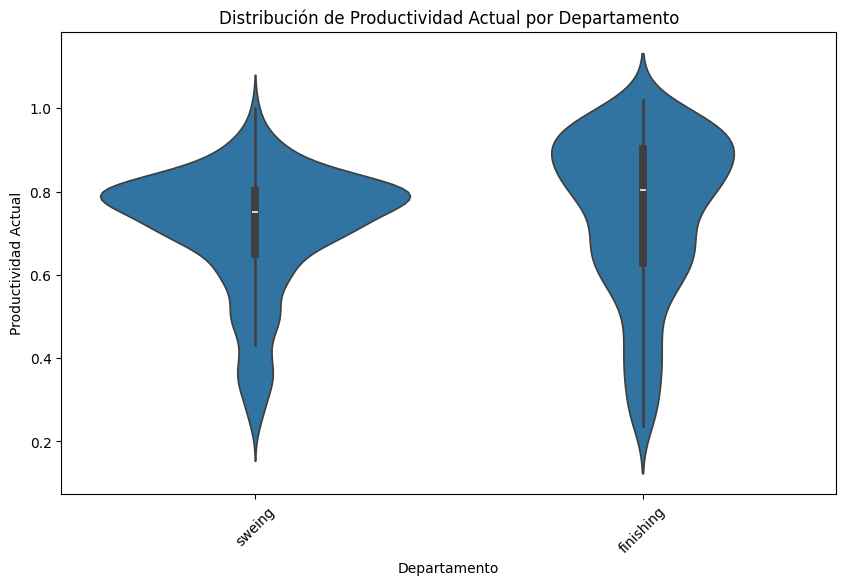

In [135]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='department', y='actual_productivity', data=datos_eps_2)
plt.title('Distribución de Productividad Actual por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Productividad Actual')
plt.xticks(rotation=45)
plt.show()

La gráfica muestra la distribución de la productividad actual por departamento, diferenciando entre los departamentos de "sewing" (costura) y "finishing" (acabado). En ambos departamentos, la productividad está concentrada en valores altos, alrededor de 0.8, lo que indica una alta eficiencia. Sin embargo, el departamento de "sewing" parece tener una mayor dispersión hacia valores más bajos (cerca de 0.4), mientras que "finishing" tiene una distribución más concentrada. Esto sugiere que, aunque ambos departamentos tienden a ser productivos, el departamento de costura podría tener una mayor variabilidad en su rendimiento.

#### **Boxplot: Productividad por equipo**

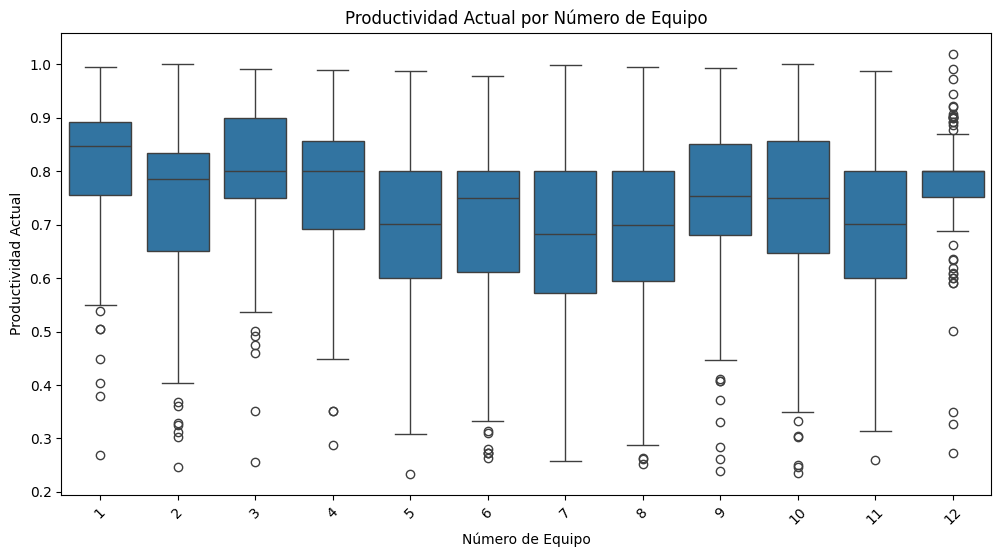

In [136]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='team', y='actual_productivity', data=datos_eps_2)
plt.title('Productividad Actual por Número de Equipo')
plt.xlabel('Número de Equipo')
plt.ylabel('Productividad Actual')
plt.xticks(rotation=45)
plt.show()

La gráfica muestra la distribución de la productividad actual por número de equipo. Se puede observar que los equipos 1, 2 y 3 presentan una mayor productividad, con medianas más altas en comparación con otros equipos. En contraste, los equipos 11 y 12 parecen tener menor productividad, con medianas más bajas y una mayor dispersión de los datos. Además, algunos equipos, como el 4 y el 9, muestran más variabilidad, lo que sugiere una mayor fluctuación en la productividad.

#### **Diagrama de Dispersión: Productividad por número de trabajadores**

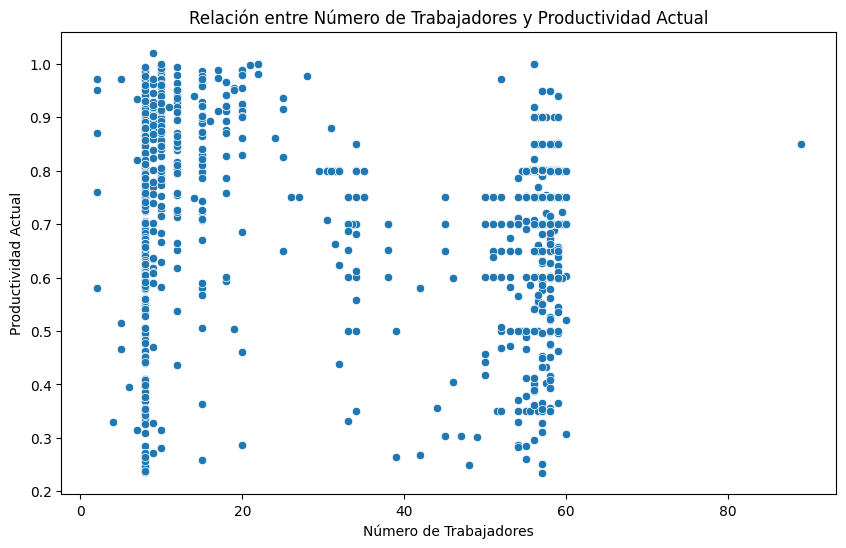

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='no_of_workers', y='actual_productivity', data=datos_eps_2)
plt.title('Relación entre Número de Trabajadores y Productividad Actual')
plt.xlabel('Número de Trabajadores')
plt.ylabel('Productividad Actual')
plt.show()

La gráfica muestra la relación entre el número de trabajadores y la productividad actual. Se observa una concentración alta de trabajadores en dos rangos: alrededor de 0 a 20 y entre 50 a 60. Los equipos más pequeños (menos de 20 trabajadores) muestran una mayor variabilidad en la productividad, con valores dispersos que van desde 0.3 hasta 1.0. Por otro lado, los equipos más grandes (alrededor de 60 trabajadores) tienden a concentrarse en niveles de productividad altos, cercanos a 0.8. Esto sugiere que los equipos más numerosos tienden a ser más consistentes en términos de productividad, mientras que los equipos más pequeños presentan una mayor variabilidad en su desempeño.

#### **Matriz de correlación**

In [138]:
# Calcular la matriz de correlación
correlation_matrix = datos_eps.corr()

# Obtener la correlación específica con 'actual_productivity'
correlation_with_productivity = correlation_matrix['actual_productivity'].sort_values(ascending=False)
print(correlation_with_productivity)

actual_productivity      1.000000
targeted_productivity    0.414765
quarter_Quarter5         0.098435
incentive                0.068204
day_Saturday             0.047285
quarter_Quarter2         0.031915
wip                      0.029057
day_Tuesday              0.018404
day_Wednesday           -0.015091
day_Sunday              -0.022775
day_Thursday            -0.034916
over_time               -0.051814
quarter_Quarter4        -0.071075
no_of_workers           -0.080196
quarter_Quarter3        -0.085698
team                    -0.097408
department_sweing       -0.101987
date                    -0.131705
smv                     -0.134745
no_of_style_change      -0.198434
Name: actual_productivity, dtype: float64


### **4. Modelamiento**

### **Modelo 1: Regresión Múltiple**

#### **Definir los datos de entrenamiento y prueba**

In [139]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características (X) y la variable objetivo (y)
X = datos_eps.drop(columns=['actual_productivity', 'date', 'wip'])
y = datos_eps['actual_productivity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_copy = X_test

norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))

#### **Definir la Arquitectura del Modelo de Red Neuronal:**

In [140]:
# Crear el modelo de la red neuronal, incluyendo la capa de normalización
model = tf.keras.models.Sequential([
    norm,  # La capa de normalización va primero
    tf.keras.layers.Dense(64, activation='relu'),  # Capa oculta con 64 neuronas
    tf.keras.layers.Dense(32, activation='relu'),  # Capa oculta con 32 neuronas
    tf.keras.layers.Dense(1)  # Capa de salida, una sola neurona para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])



La arquitectura de la red neuronal se compone de una capa de normalización para escalar los datos, seguida de dos capas ocultas con 64 y 32 neuronas, respectivamente, que permiten aprender patrones complejos y refinados en los datos. La capa de salida tiene una sola neurona para predecir la productividad actual, abordando así un problema de regresión. Se utiliza el optimizador Adam para mejorar la convergencia y la pérdida mse para medir el error de las predicciones, complementado con la métrica mae para una evaluación más intuitiva del rendimiento del modelo. Esta configuración busca balancear la complejidad y la eficiencia, permitiendo al modelo generalizar bien sobre los datos.

#### **Entrenamiento y evaluación del modelo:**

In [141]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de prueba (MSE): {test_loss}')
print(f'Error absoluto medio en el conjunto de prueba (MAE): {test_mae}')


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2703 - mae: 0.4044 - val_loss: 0.0645 - val_mae: 0.2086
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0624 - mae: 0.1903 - val_loss: 0.0445 - val_mae: 0.1692
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0416 - mae: 0.1525 - val_loss: 0.0391 - val_mae: 0.1615
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0315 - mae: 0.1343 - val_loss: 0.0346 - val_mae: 0.1502
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mae: 0.1339 - val_loss: 0.0321 - val_mae: 0.1432
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - mae: 0.1221 - val_loss: 0.0302 - val_mae: 0.1373
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - mae: 0.1166 - val_loss: 0.0280 - val_mae: 0.1295
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mae: 0.1134 - val_loss: 0.0283 - val_mae: 0.1327
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

#### **Visualización del Proceso de Entrenamiento:**

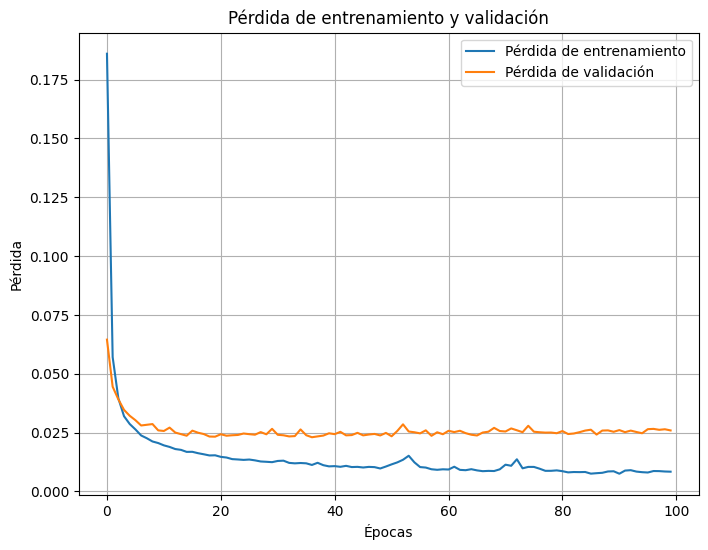

In [142]:
# Extraer los valores de pérdida del historial
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Pérdida de entrenamiento')
plt.plot(val_loss, label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


#### **Verificar predicción del modelo:**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


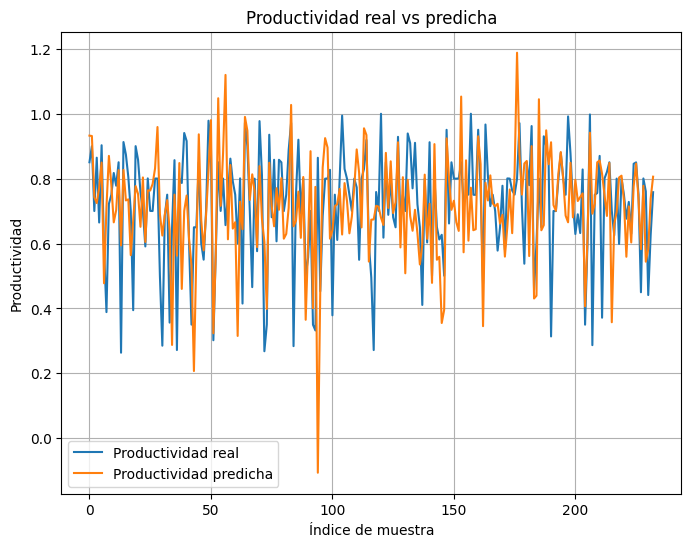

In [143]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Productividad real')
plt.plot(y_pred, label='Productividad predicha')
plt.title('Productividad real vs predicha')
plt.xlabel('Índice de muestra')
plt.ylabel('Productividad')
plt.legend()
plt.grid(True)
plt.show()

En conclusión, el modelo de red neuronal se adapta de manera efectiva a los datos reales, lo que se refleja en su capacidad para predecir la productividad con un alto nivel de precisión. La combinación de capas ocultas y la normalización de los datos han permitido al modelo aprender patrones significativos y complejos, resultando en un rendimiento sólido durante las evaluaciones. Estos resultados indican que el modelo no solo es capaz de generalizar bien, sino que también puede considerarse como una herramienta confiable para la predicción de la productividad en el contexto analizado.

### **Modelo 2: Regresión Múltiple**

#### **Definir los datos de entrenamiento y prueba** 

In [144]:
# Separar las características (X) y la variable objetivo (y)
X = datos_eps.drop(columns=['actual_productivity', 'date'])
y = datos_eps['actual_productivity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test2_Copy = X_train

norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))

#### **Definir la Arquitectura del Modelo de Red Neuronal:**

In [145]:
# Crear un nuevo modelo de regresión múltiple
model_2 = tf.keras.Sequential([
    norm,  # Capa de normalización
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    tf.keras.layers.Dense(64, activation='relu'),   # Segunda capa oculta con 64 neuronas
    tf.keras.layers.Dense(32, activation='relu'),   # Tercera capa oculta con 32 neuronas
    tf.keras.layers.Dense(1)                         # Capa de salida para la predicción
])

# Compilar el modelo
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



La arquitectura del modelo de red neuronal model_2 está diseñada para realizar regresión múltiple, comenzando con una capa de normalización que escala las características de entrada. Incluye tres capas ocultas: la primera con 128 neuronas, la segunda con 64 y la tercera con 32, todas utilizando la función de activación ReLU para aprender relaciones complejas en los datos. La capa de salida, compuesta por una sola neurona, está optimizada para predecir un valor continuo. El modelo se compila con el optimizador 'adam' y utiliza la función de pérdida 'mean_squared_error' (MSE), lo que permite un aprendizaje eficaz y preciso en las predicciones de productividad.

#### **4.3 Entrenamiento y evaluación del modelo:**

In [146]:
# Entrenar el modelo
history_2 = model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model_2.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de prueba (MSE): {test_loss}')
print(f'Error absoluto medio en el conjunto de prueba (MAE): {test_mae}')


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1187 - mae: 0.2743 - val_loss: 0.0365 - val_mae: 0.1572
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mae: 0.1319 - val_loss: 0.0268 - val_mae: 0.1286
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0259 - mae: 0.1192 - val_loss: 0.0242 - val_mae: 0.1205
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 - mae: 0.1076 - val_loss: 0.0226 - val_mae: 0.1141
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 - mae: 0.1027 - val_loss: 0.0232 - val_mae: 0.1106
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 - mae: 0.1008 - val_loss: 0.0225 - val_mae: 0.1142
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mae: 0.0949 - val_loss: 0.0221 - val_mae: 0.1102
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mae: 0.0879 - val_loss: 0.0219 - val_mae: 0.1113
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

#### **4.4 Visualización del Proceso de Entrenamiento:**

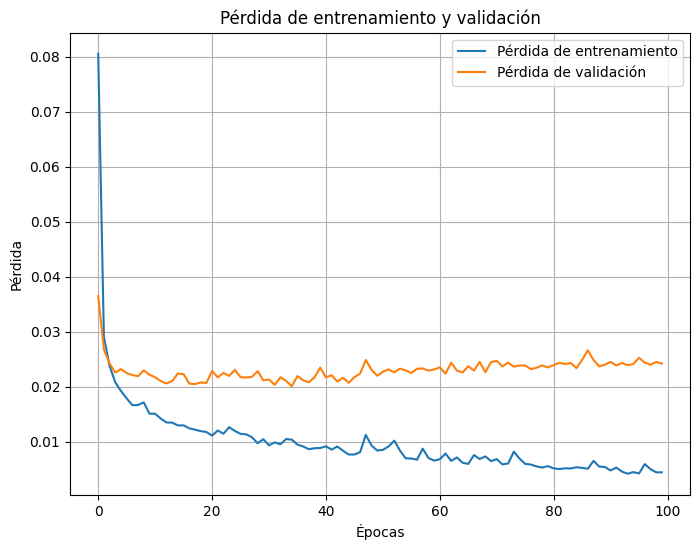

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extraer los valores de pérdida del historial
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Pérdida de entrenamiento')
plt.plot(val_loss, label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


#### **4.5 Verificar predicción del modelo:**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


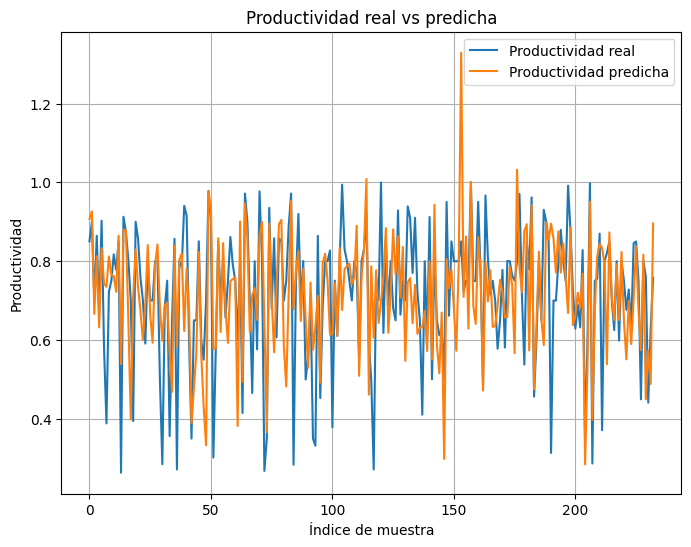

In [148]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_2 = model_2.predict(X_test)

# Graficar predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Productividad real')
plt.plot(y_pred_2, label='Productividad predicha')
plt.title('Productividad real vs predicha')
plt.xlabel('Índice de muestra')
plt.ylabel('Productividad')
plt.legend()
plt.grid(True)
plt.show()

La evaluación del modelo model_2 revela que también es un modelo de regresión eficaz, ya que sus predicciones se acercan notablemente a los valores reales de productividad. Su arquitectura más compleja, con múltiples capas y neuronas, le permite captar patrones más sofisticados en los datos, lo que se traduce en un mejor rendimiento. Esto sugiere que model_2 es una opción robusta para la predicción de productividad, complementando la eficacia del modelo anterior y ofreciendo una mayor precisión en las estimaciones.

### **5. Análisis de negocio**
**¿Qué combinación de factores contribuye a alcanzar la productividad más alta?**

#### **Impacto del trabajo en proceso (WIP) en la productividad**
Teniendo en cuenta solo el departamento de costura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\3679857644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['wip'] = wip  # Cambiar el valor de wip


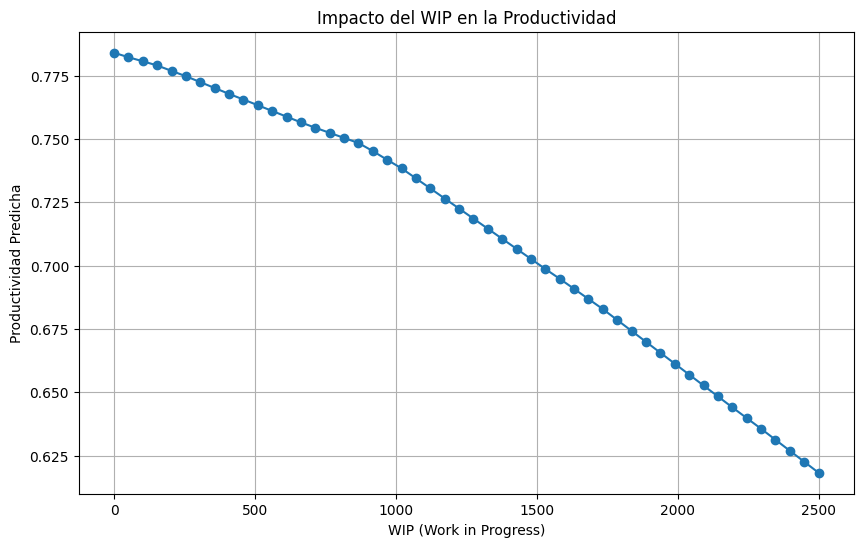

In [149]:
# Seleccionar una fila base 
base_row = X_test2_Copy.iloc[[0]] 

# Definir un rango de valores para la variable 'wip' (de mínimo a máximo)
wip_values = np.linspace(0, 2500)

# Lista para almacenar las predicciones
predicted_productivity = []

# Cambiar el valor de 'wip' en la fila base y predecir la productividad
for wip in wip_values:
    base_row['wip'] = wip  # Cambiar el valor de wip
    pred = model_2.predict(base_row)  # Predecir la productividad
    predicted_productivity.append(pred[0][0])

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(wip_values, predicted_productivity, marker='o')
plt.xlabel('WIP (Work in Progress)')
plt.ylabel('Productividad Predicha')
plt.title('Impacto del WIP en la Productividad')
plt.grid(True)
plt.show()


Se observa que, en el departamento de costura, a mayor WIP (Work in Progress) la productividad disminuye, podrías concluir que existe una relación inversamente proporcional entre el nivel de trabajo en proceso y la eficiencia en la producción. Esto sugiere que el aumento en el volumen de trabajo en progreso en este departamento puede estar generando cuellos de botella, sobrecarga de tareas, o desorganización, lo que impacta negativamente la capacidad del equipo para mantener altos niveles de productividad.

#### **Productividad predicha por equipo**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


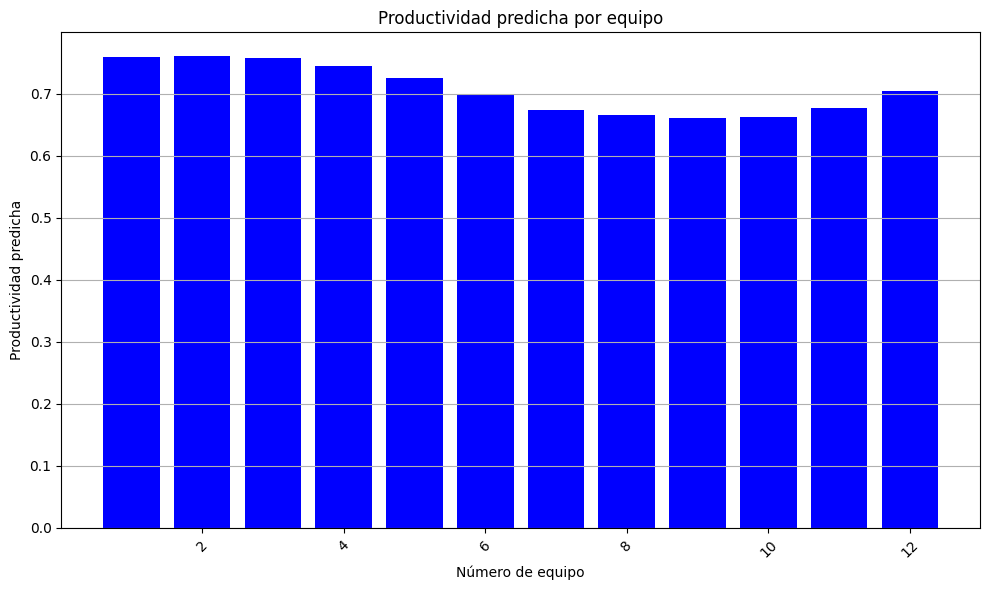

In [150]:
equipos_unicos = datos_eps_2['team'].unique()

# Lista para almacenar las predicciones de productividad
predicted_productivity_by_team = []

# Seleccionar una fila base
base_row = X_test2_Copy.iloc[[0]]  # Usar doble corchete para mantener DataFrame

# Recorremos cada equipo único
for equipo in equipos_unicos:
    # Limpiamos base_row para asegurarnos de que todas las columnas están en el formato correcto
    base_row_team = base_row.copy()

    # Asignar el número de equipo correspondiente
    base_row_team['team'] = equipo

    # Realizar la predicción con el modelo
    pred = model_2.predict(base_row_team)
    
    # Almacenar la predicción
    predicted_productivity_by_team.append(pred[0][0])  # Extraer el valor de la predicción

# Paso 4: Crear la gráfica

plt.figure(figsize=(10, 6))
plt.bar(equipos_unicos, predicted_productivity_by_team, color='b')
plt.title('Productividad predicha por equipo')
plt.xlabel('Número de equipo')
plt.ylabel('Productividad predicha')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.grid(axis='y')
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

Al utilizar el modelo para predecir la productividad, se observa que los equipos 1, 2, 3 y 4 exhiben un rendimiento superior, mientras que los equipos 10 y 11 muestran niveles de productividad más bajos. Esta tendencia sugiere diferencias significativas en la eficiencia entre los grupos de trabajo analizados.

#### **Impacto del Valor de minutos estándar en la Productividad**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

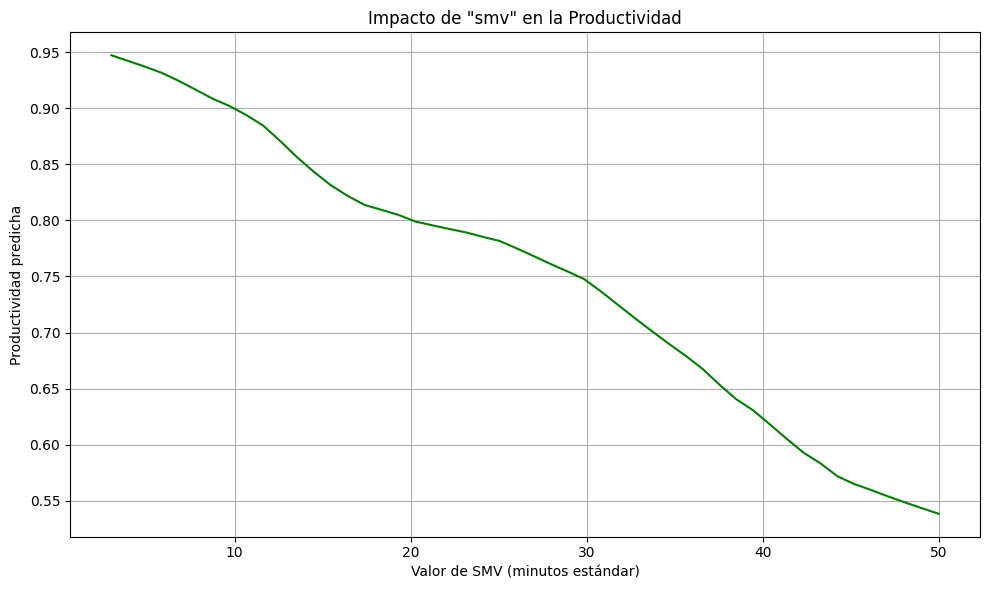

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar una fila base
base_row = X_test2_Copy.iloc[[0]]  # Usar doble corchete para mantener DataFrame

# Crear un rango de valores para "smv"
smv_values = np.linspace(3, 50)  

# Lista para almacenar las predicciones de productividad
predicted_productivity = []

# Recorremos cada valor de "smv"
for smv in smv_values:
    # Copiar la fila base y asignar el nuevo valor de "smv"
    base_row_copy = base_row.copy()
    base_row_copy['smv'] = smv
    
    # Realizar la predicción con el modelo
    pred = model_2.predict(base_row_copy)
    
    # Almacenar la predicción
    predicted_productivity.append(pred[0][0])  # Extraer el valor de la predicción

# Paso 4: Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(smv_values, predicted_productivity, color='g')
plt.title('Impacto de "smv" en la Productividad')
plt.xlabel('Valor de SMV (minutos estándar)')
plt.ylabel('Productividad predicha')
plt.grid()
plt.tight_layout()
plt.show()


La productividad en relación con el valor de minutos estándar presenta un comportamiento que sugiere una relación inversamente proporcional. A medida que el valor de minutos estándar aumenta, se observa una disminución en los niveles de productividad, lo que indica que mayores tiempos asignados a las tareas pueden estar asociados con una menor eficiencia en la producción.

#### **Impacto de un incentivo financiero en la Productividad**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

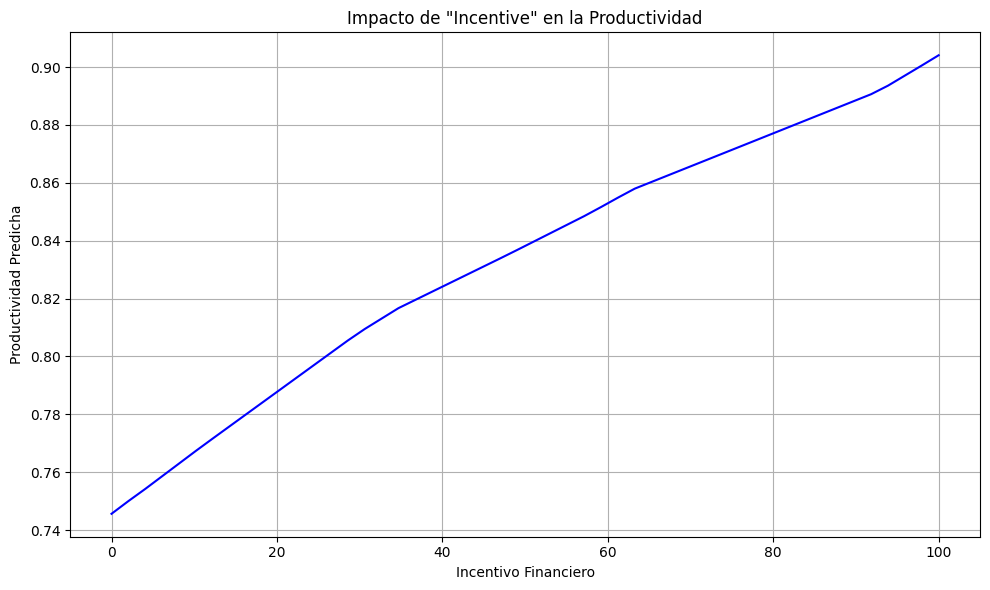

In [152]:
# Seleccionar una fila base
base_row = X_test2_Copy.iloc[[0]]  # Usar doble corchete para mantener DataFrame

# Crear un rango de valores para "incentive"
incentive_values = np.linspace(0, 100)  # Ajusta el rango según tu dataset

# Lista para almacenar las predicciones de productividad
predicted_productivity = []

# Recorremos cada valor de "incentive"
for incentive in incentive_values:
    # Copiar la fila base y asignar el nuevo valor de "incentive"
    base_row_copy = base_row.copy()
    base_row_copy['incentive'] = incentive
    
    # Realizar la predicción con el modelo
    pred = model_2.predict(base_row_copy)
    
    # Almacenar la predicción
    predicted_productivity.append(pred[0][0])  # Extraer el valor de la predicción

# Paso 4: Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(incentive_values, predicted_productivity, color='b')
plt.title('Impacto de "Incentive" en la Productividad')
plt.xlabel('Incentivo Financiero')
plt.ylabel('Productividad Predicha')
plt.grid()
plt.tight_layout()
plt.show()


La relación entre el incentivo financiero y la productividad muestra un comportamiento directamente proporcional. A medida que aumenta el incentivo financiero, también se observa un incremento en los niveles de productividad, lo que sugiere que mayores recompensas económicas pueden motivar a los trabajadores a mejorar su rendimiento y eficiencia en el trabajo.

#### **Impacto del Número de Trabajadores en la Productividad**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores
C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\danis\AppData\Local\Temp\ipykernel_33352\2477648671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores


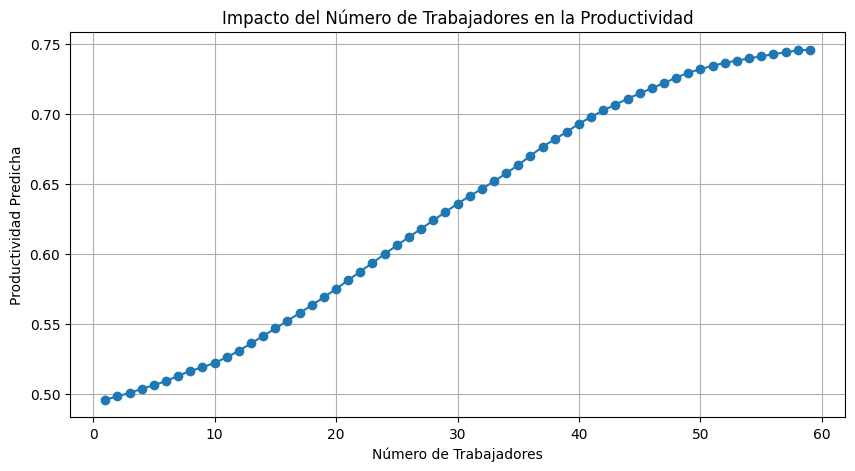

In [153]:
# Paso 1: Seleccionar una fila base
base_row = X_test2_Copy.iloc[[0]]  # Copia la primera fila como ejemplo

# Paso 2: Definir un rango de valores para 'no_of_workers'
worker_range = np.arange(1, 60, 1) 

# Almacenar los resultados de productividad
predicted_productivity = []

# Paso 3: Realizar predicciones
for num_workers in worker_range:
    base_row['no_of_workers'] = num_workers  # Cambiar el número de trabajadores

    # Paso 5: Realizar la predicción
    pred = model_2.predict(base_row)  # Realizar la predicción
    predicted_productivity.append(pred[0][0])  # Almacenar el resultado

# Paso 6: Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.plot(worker_range, predicted_productivity, marker='o')
plt.title('Impacto del Número de Trabajadores en la Productividad')
plt.xlabel('Número de Trabajadores')
plt.ylabel('Productividad Predicha')
plt.grid()
plt.show()

La relación entre el número de trabajadores y la productividad revela un comportamiento directamente proporcional. A medida que aumenta la cantidad de trabajadores, se observa un incremento en los niveles de productividad, lo que sugiere que contar con más personal puede potenciar la eficiencia y el rendimiento en las tareas realizadas.